# 1 - Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

In [5]:
#import citibikes data

citi_03 = pd.read_csv(r'C:/Users/mrtak/10-2023 City Bike Analysis/city_01.csv')

In [6]:
#drop Unnamed: 0
citi_03 = citi_03.drop(columns = ['Unnamed: 0'])

In [8]:
citi_03.head()

,day_of_week,start_hour,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,start_of_ride,end_of_ride
0,Mon,18,523,W 38 St & 8 Ave,40.754666,-73.991382,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968.0,2,2013-09-09 18:18:55,2013-09-09 18:35:28
1,Thu,18,257,Lispenard St & Broadway,40.719392,-74.002472,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983.0,1,2013-09-12 18:38:53,2013-09-12 18:48:34
2,Wed,19,479,9 Ave & W 45 St,40.760193,-73.991255,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989.0,1,2013-09-18 19:44:04,2013-09-18 19:50:05
3,Sat,11,527,E 33 St & 1 Ave,40.743156,-73.974347,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988.0,2,2013-09-28 11:54:37,2013-09-28 12:03:58
4,Fri,22,293,Lafayette St & E 8 St,40.730287,-73.990765,432,E 7 St & Avenue A,40.726218,-73.983799,427,Subscriber,1986.0,2,2013-09-27 22:01:01,2013-09-27 22:08:08


# 02 - Convert Start Time & End Time to Float

In [16]:
citi_03['start_of_ride'] = pd.to_datetime(citi_03['start_of_ride'], errors='coerce')

In [17]:
#create new column with start time as float
start_ride_time = citi_03['start_of_ride'].dt.hour + citi_03['start_of_ride'].dt.minute/60
start_ride_time

0        18.300000
1        18.633333
2        19.733333
3        11.900000
4        22.016667
           ...    
42986    15.500000
42987    16.450000
42988    17.533333
42989    18.133333
42990    21.900000
Name: start_of_ride, Length: 42991, dtype: float64

In [18]:
citi_03['end_of_ride'] = pd.to_datetime(citi_03['end_of_ride'], errors='coerce')

In [20]:
#create new column with end time as float
end_ride_time = citi_03['end_of_ride'].dt.hour + citi_03['end_of_ride'].dt.minute/60
end_ride_time

0        18.583333
1        18.800000
2        19.833333
3        12.050000
4        22.133333
           ...    
42986    15.766667
42987    16.866667
42988    17.866667
42989    18.416667
42990    22.000000
Name: end_of_ride, Length: 42991, dtype: float64

In [39]:
#create new column trip duration in minutes

trip_duration_min = citi_03['trip_duration']/60
trip_duration_min

0        16.550000
1         9.683333
2         6.016667
3         9.350000
4         7.116667
           ...    
42986    16.250000
42987    25.683333
42988    19.850000
42989    17.500000
42990     6.166667
Name: trip_duration, Length: 42991, dtype: float64

In [40]:
#add threecolumns

citi_03['start_of_ride'] = start_ride_time
citi_03['end_of_ride'] = end_ride_time
citi_03['trip_duration_min'] = trip_duration_min

In [41]:
citi_03.head()

,day_of_week,start_hour,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,start_of_ride,end_of_ride,trip_duration_min
0,Mon,18,523,W 38 St & 8 Ave,40.754666,-73.991382,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968.0,2,18.300000,18.583333,16.550000
1,Thu,18,257,Lispenard St & Broadway,40.719392,-74.002472,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983.0,1,18.633333,18.800000,9.683333
2,Wed,19,479,9 Ave & W 45 St,40.760193,-73.991255,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989.0,1,19.733333,19.833333,6.016667
3,Sat,11,527,E 33 St & 1 Ave,40.743156,-73.974347,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988.0,2,11.900000,12.050000,9.350000
4,Fri,22,293,Lafayette St & E 8 St,40.730287,-73.990765,432,E 7 St & Avenue A,40.726218,-73.983799,427,Subscriber,1986.0,2,22.016667,22.133333,7.116667


In [42]:
#create a sample from larger data set 
sample = citi_03.sample(n=5000)
sample.head()

,day_of_week,start_hour,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,start_of_ride,end_of_ride,trip_duration_min
26659,Sat,1,151,Cleveland Pl & Spring St,40.721816,-73.997203,268,Howard St & Centre St,40.719105,-73.999733,118,Subscriber,1990.0,1,1.816667,1.850000,1.966667
36239,Sun,16,317,E 6 St & Avenue B,40.724537,-73.981854,470,W 20 St & 8 Ave,40.743453,-74.000040,1409,Subscriber,1980.0,2,16.800000,17.200000,23.483333
26922,Mon,8,523,W 38 St & 8 Ave,40.754666,-73.991382,472,E 32 St & Park Ave,40.745712,-73.981948,451,Subscriber,1972.0,1,8.166667,8.283333,7.516667
36873,Mon,9,297,E 15 St & 3 Ave,40.734232,-73.986923,263,Elizabeth St & Hester St,40.717290,-73.996375,679,Subscriber,1935.0,1,9.150000,9.333333,11.316667
39065,Mon,16,441,E 52 St & 2 Ave,40.756014,-73.967416,528,2 Ave & E 31 St,40.742909,-73.977061,446,Subscriber,1984.0,1,16.166667,16.283333,7.433333


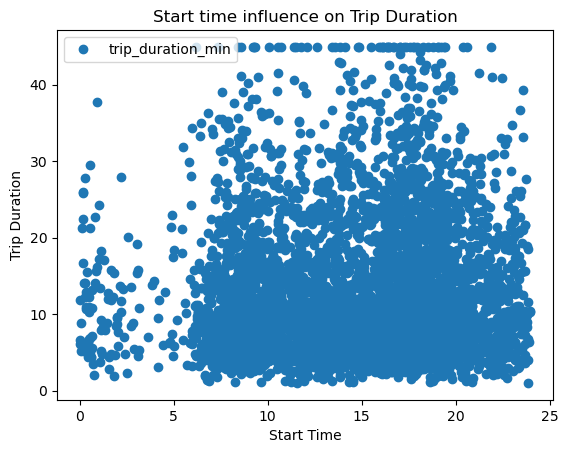

In [43]:
# Create a scatterplot comparing start of ride and trip duration
# used sample because using entire dataset covered the whole field in dots

sample.plot(x = 'start_of_ride', y= 'trip_duration_min' ,style='o') 
plt.title('Start time influence on Trip Duration')  
plt.xlabel('Start Time')  
plt.ylabel('Trip Duration')  
plt.show()

# 3 - Prepare Variables for Regression

In [50]:
#reshape variables for regression 
X = sample['start_of_ride'].values.reshape(-1, 1)
y = sample['trip_duration_min'].values.reshape(-1, 1)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [52]:
#create linear regression object
regression = LinearRegression()

In [53]:
#fit regression to training set
regression.fit(X_train, y_train)

LinearRegression()

In [55]:
y_predicted = regression.predict(X_test)

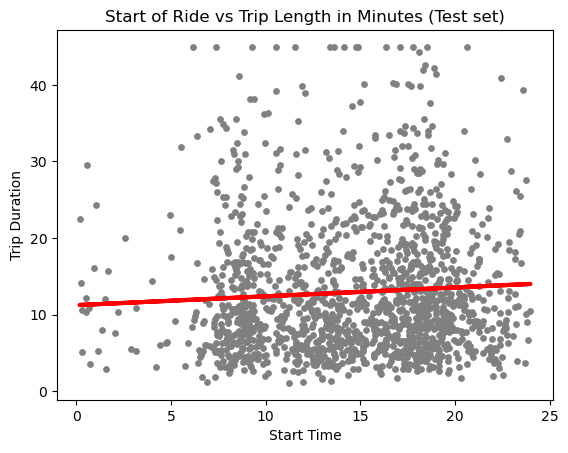

In [56]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Start of Ride vs Trip Length in Minutes (Test set)')
plot_test.xlabel('Start Time')
plot_test.ylabel('Trip Duration')
plot_test.show()

### Hypothesis: The later in the day the checkout time the longer the ride will be


In [57]:
# Create objects for model mean squared error and R2 score

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [58]:
# Print the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.11549247]]
Mean squared error:  76.21373634657128
R2 score:  0.000320336992374437


### As day passes by by hour, trip time increases by 0.11 minutes...
### the MSE is quite large and R2 is quite small indicating a poor fit

In [59]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,19.016667,13.659029
1,1.200000,12.019036
2,33.916667,13.368373
3,16.100000,13.266355
4,5.500000,13.071943
5,7.633333,12.097956
6,11.133333,13.302928
7,34.016667,13.197060
8,14.083333,12.584949
9,21.516667,13.272130


### Predicted times were quite far off from actual values most cases. This model is poor at predicting trip time based on time of the day.

# 4 - Create Subset of all bike rides less than 30 minutes between 5 AM to 6PM

In [60]:
#create subset with checkout times between 5AM and 3PM and trips 1 hour or shorter
subset = citi_03[(citi_03['start_of_ride'] >= 5.00) & (citi_03['start_of_ride'] <= 18.00) & (citi_03['trip_duration_min'] <= 30.00)]
subset.head()

,day_of_week,start_hour,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,start_of_ride,end_of_ride,trip_duration_min
3,Sat,11,527,E 33 St & 1 Ave,40.743156,-73.974347,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988.0,2,11.900000,12.050000,9.350000
5,Sun,13,380,W 4 St & 7 Ave S,40.734011,-74.002939,317,E 6 St & Avenue B,40.724537,-73.981854,639,Subscriber,1994.0,1,13.216667,13.383333,10.650000
6,Sat,10,346,Bank St & Hudson St,40.736529,-74.006180,212,W 16 St & The High Line,40.743349,-74.006818,263,Subscriber,1969.0,1,10.800000,10.866667,4.383333
7,Fri,12,510,W 51 St & 6 Ave,40.760660,-73.980420,422,W 59 St & 10 Ave,40.770513,-73.988038,666,Subscriber,1993.0,1,12.483333,12.666667,11.100000
8,Tue,16,446,W 24 St & 7 Ave,40.744876,-73.995299,342,Columbia St & Rivington St,40.717400,-73.980166,582,Subscriber,1983.0,1,16.933333,17.083333,9.700000


In [61]:
subset.shape

(27884, 17)

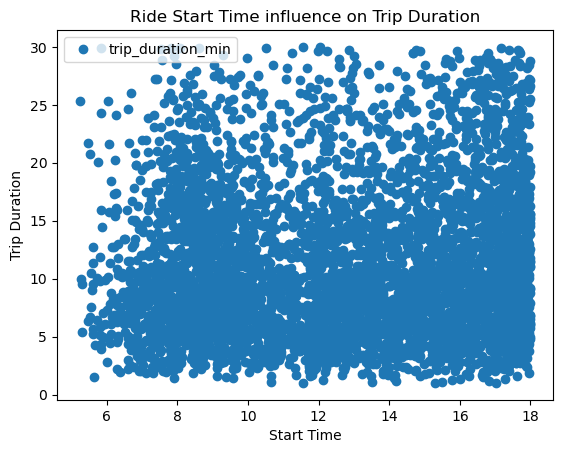

In [62]:
# Create a scatterplot comparing checkout time and trip time
sub_sample = subset.sample(n=5000)

sub_sample.plot(x = 'start_of_ride', y= 'trip_duration_min' ,style='o') 
plt.title('Ride Start Time influence on Trip Duration')  
plot_test.xlabel('Start Time')
plot_test.ylabel('Trip Duration')
plot_test.show()

In [63]:
#reshape variables for regression 
Xs = sub_sample['start_of_ride'].values.reshape(-1, 1)
ys = sub_sample['trip_duration_min'].values.reshape(-1, 1)

In [69]:
Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs, ys, test_size = 0.3, random_state = 0)

In [65]:
#create linear regression object
sub_regression = LinearRegression()

In [72]:
ys_predicted = regression.predict(X_test)

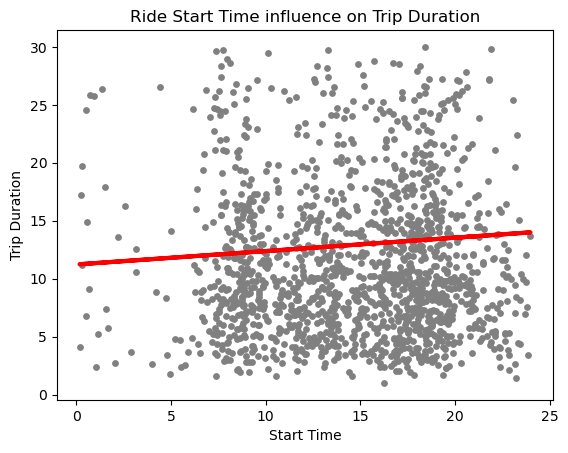

In [73]:
# Create a plot that shows the regression line from the model on the sample set.

sub_sample = plt
sub_sample.scatter(X_test, ys_test, color='gray', s = 15)
sub_sample.plot(X_test, ys_predicted, color='red', linewidth =3)
sub_sample.title('Ride Start Time influence on Trip Duration')
sub_sample.xlabel('Start Time')
sub_sample.ylabel('Trip Duration')
sub_sample.show()

In [74]:
# Create objects for model mean squared error and R2 score

sub_rmse = mean_squared_error(ys_test, ys_predicted)
sub_r2 = r2_score(ys_test, ys_predicted)

In [75]:
# Print the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', sub_rmse)
print('R2 score: ', sub_r2)

Slope: [[0.11549247]]
Mean squared error:  43.83748687045504
R2 score:  -0.07558947661563975


### the MSE and R2 are smaller in this instance but still indicate a poorly fitting model

In [76]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': ys_test.flatten(), 'Predicted': ys_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,8.566667,13.659029
1,7.966667,12.019036
2,8.533333,13.368373
3,10.966667,13.266355
4,9.566667,13.071943
5,24.450000,12.097956
6,9.033333,13.302928
7,5.516667,13.197060
8,9.616667,12.584949
9,12.516667,13.272130


### the predicted values compared to actual values support the poor fit of the model

In [77]:
#save and export dataframe
citi_03.to_pickle(r'C:\Users\mrtak\10-2023 City Bike Analysis\city_03.pkl')